# US census

### Data Lit  |  Homework Assignment | Logistic Regression

by Denis Volchugin in April 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import missingno as msngo

from bokeh.io import output_file, output_notebook, push_notebook
from bokeh.plotting import figure

from scipy.stats import norm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

sns.set()

output_notebook()

Loading BokehJS ...

In [2]:
train = pd.read_csv ('../Data/adult-training.csv')
test = pd.read_csv ('../Data/adult-test.csv', skiprows=1)

In [3]:
train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
test.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [5]:
names = ["age", "workclass", "fnlwgt", "education", "education_num", 
                 "marital_status", "occupation", "relationship", "race", "gender", 
                 "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_bracket"]

In [6]:
train.columns, test.columns = names, names

In [7]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32560,NaN,NaN,NaN,38.5816,13.6406,17,28,37,48,90
workclass,32560,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32560,NaN,NaN,NaN,189782,105550,12285,117832,178363,237054,1.48470e+06
education,32560,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32560,NaN,NaN,NaN,10.0806,2.57271,1,9,10,12,16
marital_status,32560,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32560,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32560,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32560,5,White,27815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,32560,2,Male,21789,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,16280,NaN,NaN,NaN,38.7683,13.8492,17,28,37,48,90
workclass,16280,9,Private,11209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16280,NaN,NaN,NaN,189433,105718,13492,116716,177830,238384,1.4904e+06
education,16280,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,16280,NaN,NaN,NaN,10.0731,2.56751,1,9,10,12,16
marital_status,16280,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,16280,15,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,16280,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,16280,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,16280,2,Male,10859,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
cats = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "gender"]

In [10]:
nums = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

In [11]:
for cat in cats:
    print(cat, ":", train[cat].nunique(), "\n", train[cat].unique())

workclass : 9 
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education : 16 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status : 7 
 [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : 15 
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
relationship : 6 
 [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race : 5 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
gender : 2 
 [' Male' ' Female']


In [12]:
train.replace (' ?', 'Unknown', inplace=True)
test.replace (' ?', 'Unknown', inplace=True)

In [13]:
pd.Series (train.education_num.values, train.education).to_dict()

{' Bachelors': 13,
 ' HS-grad': 9,
 ' 11th': 7,
 ' Masters': 14,
 ' 9th': 5,
 ' Some-college': 10,
 ' Assoc-acdm': 12,
 ' Assoc-voc': 11,
 ' 7th-8th': 4,
 ' Doctorate': 16,
 ' Prof-school': 15,
 ' 5th-6th': 3,
 ' 10th': 6,
 ' 1st-4th': 2,
 ' Preschool': 1,
 ' 12th': 8}

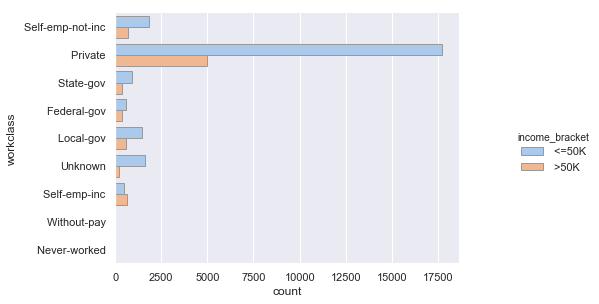

In [14]:
sns.catplot (y="workclass", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,4)

In [15]:
WC = {' Self-emp-not-inc': 0, ' Private': 1, ' State-gov': 0, ' Federal-gov': 1,
       ' Local-gov': 0, 'Unknown': 0, ' Self-emp-inc': 1, ' Without-pay': 0,
       ' Never-worked': 0}

In [16]:
train['workclass_num'] = train.workclass.map (WC)

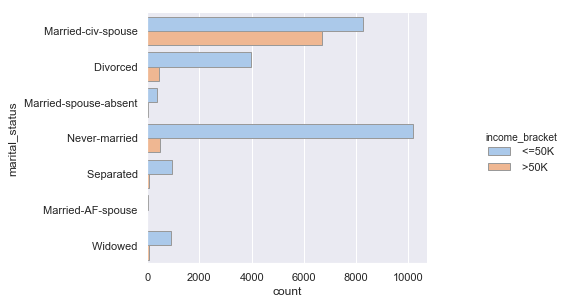

In [17]:
sns.catplot (y="marital_status", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,4)

In [18]:
MS = {' Married-civ-spouse': 1, ' Divorced': 0, ' Married-spouse-absent': 0,
 ' Never-married': 0, ' Separated': 0, ' Married-AF-spouse': 0, ' Widowed': 0}

In [19]:
train['marital_status_num'] = train.marital_status.map (MS)

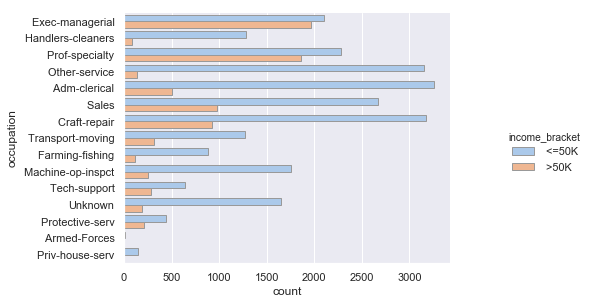

In [20]:
sns.catplot (y="occupation", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,4)

In [21]:
OC = {' Exec-managerial': 1, ' Handlers-cleaners': 0, ' Prof-specialty': 1,
 ' Other-service': 0, ' Adm-clerical': 0, ' Sales': 0, ' Craft-repair': 0,
 ' Transport-moving': 0, ' Farming-fishing': 0, ' Machine-op-inspct': 0,
 ' Tech-support': 0, 'Unknown': 0, ' Protective-serv': 0, ' Armed-Forces': 1,
 ' Priv-house-serv': 0}

In [22]:
train['occupation_num'] = train.occupation.map (OC)

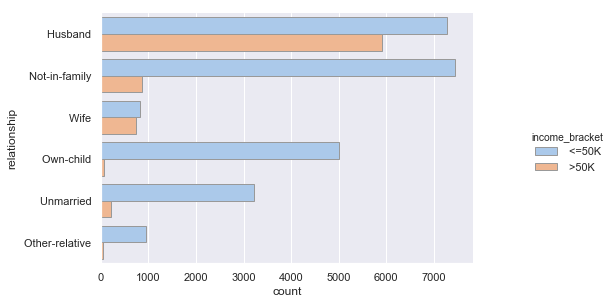

In [23]:
sns.catplot (y="relationship", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,4)

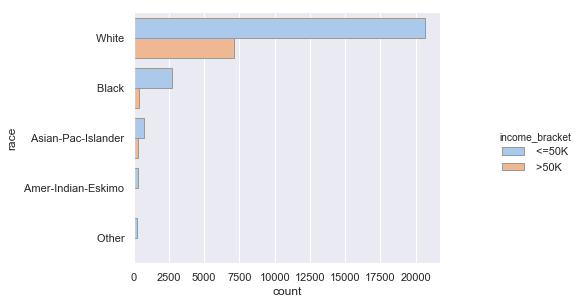

In [24]:
sns.catplot (y="race", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,4)

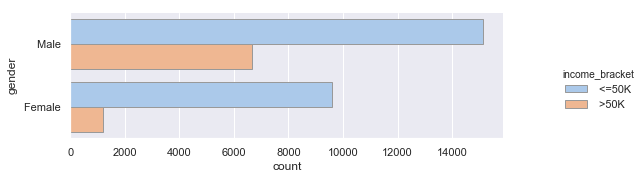

In [25]:
sns.catplot (y="gender", hue="income_bracket", kind="count", 
             palette='pastel',  edgecolor=".6", data=train).fig.set_size_inches(10,2)

In [26]:
T = {' >50K': 1, ' <=50K': 0}

In [27]:
train['target'] = train.income_bracket.map(T)

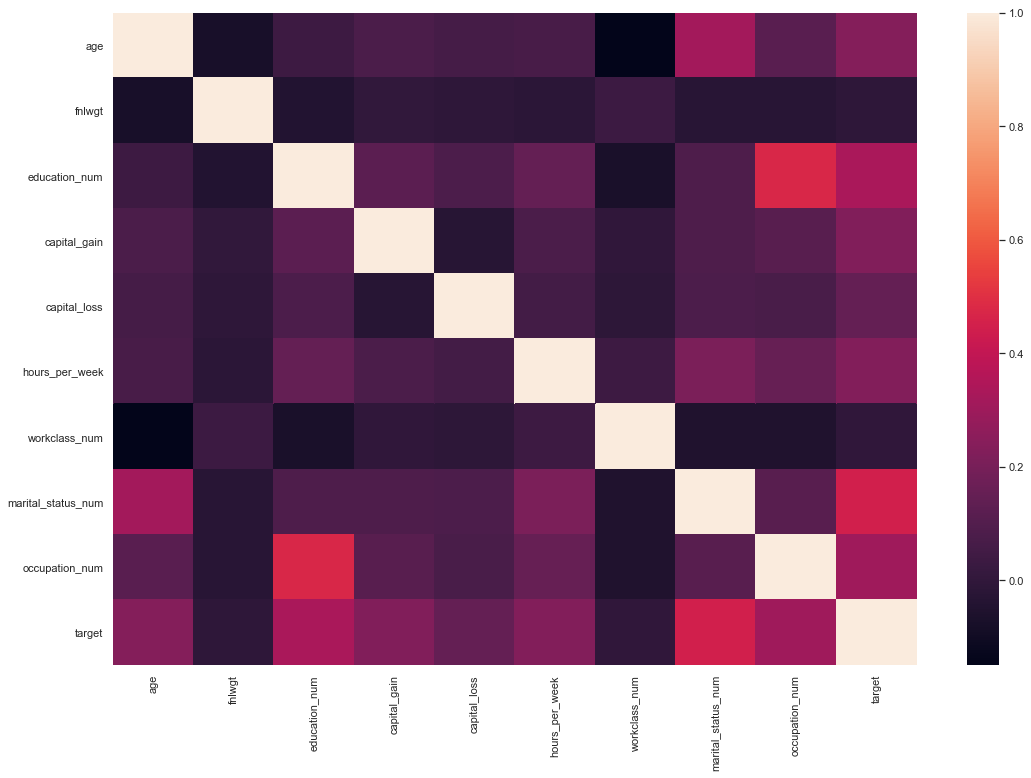

In [28]:
corrmatrix = train.corr(method='pearson')
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corrmatrix);

In [29]:
corrmatrix.nlargest(10, 'target')['target']

target                1.000000
marital_status_num    0.444688
education_num         0.335182
occupation_num        0.305896
age                   0.234039
hours_per_week        0.229690
capital_gain          0.223333
capital_loss          0.150523
workclass_num        -0.001603
fnlwgt               -0.009481
Name: target, dtype: float64

In [30]:
train2 = train[['marital_status_num', 'education_num', 
               'occupation_num', 'age', 'capital_gain', 'capital_loss', 'workclass_num']]
train2.head()

,marital_status_num,education_num,occupation_num,age,capital_gain,capital_loss,workclass_num
0,1,13,1,50,0,0,0
1,0,9,0,38,0,0,1
2,1,7,0,53,0,0,1
3,1,13,1,28,0,0,1
4,1,14,1,37,0,0,1


In [31]:
x_train, x_test, y_train, y_test = train_test_split(train2, train['target'], random_state=60, test_size=0.2)
(x_train.shape, x_test.shape)

((26048, 7), (6512, 7))

In [32]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test);

/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/Users/denisvolchugin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [35]:
accuracy_score(y_train_pred, y_train)

0.8447097665847666

In [36]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19752
           1       0.73      0.56      0.64      6296

   micro avg       0.84      0.84      0.84     26048
   macro avg       0.80      0.75      0.77     26048
weighted avg       0.84      0.84      0.84     26048



In [37]:
test['occupation_num'] = test.occupation.map (OC)

In [38]:
test['marital_status_num'] = test.marital_status.map (MS)

In [39]:
test['workclass_num'] = test.workclass.map (WC)

In [40]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,occupation_num,marital_status_num,workclass_num
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0,1,1
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0,1,0
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0,1,1
3,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K.,0,0,0
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,0,0,1


In [55]:
test2 = test[['marital_status_num', 'education_num', 
               'occupation_num', 'age', 'capital_gain', 'capital_loss', 'workclass_num']]
test2.head()

,marital_status_num,education_num,occupation_num,age,capital_gain,capital_loss,workclass_num
0,1,9,0,38,0,0,1
1,1,12,0,28,0,0,0
2,1,10,0,44,7688,0,1
3,0,10,0,18,0,0,0
4,0,6,0,34,0,0,1


In [53]:
y_test_predict2 = pd.DataFrame(model.predict (test2), columns=['target'])

In [54]:
y_test_predict2.head()

,target
0,1
1,1
2,1
3,1
4,1


In [49]:
test = pd.concat ([test, y_test_predict2], axis=1)
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,occupation_num,marital_status_num,workclass_num,0,target
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0,1,1,1,1
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0,1,0,1,1
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0,1,1,1,1
3,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K.,0,0,0,1,1
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,0,0,1,1,1


In [50]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,occupation_num,marital_status_num,workclass_num,0,target
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0,1,1,1,1
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0,1,0,1,1
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0,1,1,1,1
3,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K.,0,0,0,1,1
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,0,0,1,1,1


In [56]:
test.target.unique()

array([1])